In [1]:
import numpy as np

In [2]:
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt # 可视化模块

# create some data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # randomize the data

Using TensorFlow backend.


In [3]:
X

array([-0.70854271,  0.1758794 , -0.30653266,  0.74874372, -0.02512563,
        0.33668342, -0.85929648,  0.01507538, -0.13567839,  0.72864322,
        0.24623116, -0.74874372, -0.78894472,  0.50753769,  0.03517588,
        0.35678392, -0.55778894,  0.2361809 , -0.25628141, -0.44723618,
        0.2160804 , -0.43718593, -0.64824121,  0.69849246, -0.03517588,
       -0.45728643,  0.86934673,  0.73869347,  0.53768844, -0.67839196,
       -0.75879397,  0.55778894,  0.28643216, -0.05527638, -0.86934673,
        0.1959799 , -0.57788945, -0.9798995 , -0.6080402 , -0.63819095,
        0.84924623,  0.41708543,  0.13567839,  0.79899497, -0.47738693,
        0.46733668,  0.59798995, -0.80904523, -0.98994975, -0.36683417,
       -0.5678392 , -0.00502513, -0.53768844, -0.37688442, -0.65829146,
       -0.1959799 ,  0.06532663,  0.44723618, -0.01507538, -0.6281407 ,
        0.02512563, -0.71859296, -0.14572864, -0.46733668,  0.07537688,
        0.85929648,  0.76884422,  0.40703518, -0.68844221,  0.68

In [9]:
Y = 0.5*X + 2 + np.random.normal(0,0.05,(200,))

In [10]:
Y

array([1.66851812, 2.12220988, 1.91611873, 2.38979647, 1.96473269,
       2.11662688, 1.58217043, 2.05326658, 1.95885373, 2.4277956 ,
       2.13544689, 1.68732448, 1.66384243, 2.2702853 , 2.03148986,
       2.14968674, 1.76442495, 2.10802586, 1.93269542, 1.81936289,
       2.15190248, 1.83941395, 1.71399197, 2.21820555, 1.97918099,
       1.79781646, 2.43645587, 2.31211201, 2.21764353, 1.71912829,
       1.64285239, 2.2663785 , 2.11081029, 2.09338152, 1.5614153 ,
       2.19655545, 1.72824772, 1.56444412, 1.72673075, 1.67311017,
       2.39817488, 2.12624087, 2.07791136, 2.40515644, 1.80701389,
       2.16050089, 2.30373845, 1.57656517, 1.52482139, 1.7639545 ,
       1.76787463, 2.01204511, 1.74877623, 1.86751173, 1.67509082,
       1.95941218, 2.0126989 , 2.31574759, 2.04672223, 1.73762178,
       1.97249596, 1.65257838, 1.98435822, 1.74193776, 2.05272917,
       2.41693508, 2.37609913, 2.24686996, 1.61790402, 2.37607665,
       1.82677368, 2.29512653, 1.52756173, 1.79404414, 2.08314

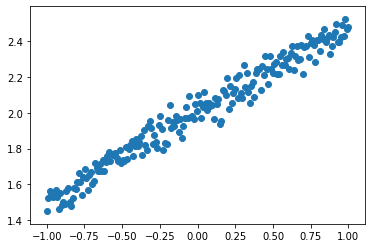

In [11]:
plt.scatter(X,Y)
plt.show()

In [12]:
X_train, Y_train = X[:160], Y[:160]
X_test, Y_test = X[160:], Y[160:]

# 1.create the model

In [30]:
model = Sequential()
model.add(Dense(output_dim=1,input_dim=1))

/Users/wangjianyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  


In [31]:
model.compile(loss='mse',optimizer='sgd')

In [32]:
print('Training ----------')
for step in range(801):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost per 100 epochs:',cost)

Training ----------
train cost per 100 epochs: 4.025457
train cost per 100 epochs: 0.079967335
train cost per 100 epochs: 0.005678075
train cost per 100 epochs: 0.0031067482
train cost per 100 epochs: 0.0027396723
train cost per 100 epochs: 0.0026513948
train cost per 100 epochs: 0.0026290447
train cost per 100 epochs: 0.0026233653
train cost per 100 epochs: 0.0026219212


In [34]:
print('Testing ----------')
cost = model.evaluate(X_test, Y_test, batch_size=40) 
print('test cost',cost)
w, b = model.layers[0].get_weights()
print('weights:',w,'bias',b)

Testing ----------
40/40 [==============================] - 0s 751us/step
test cost 0.003239685669541359
weights: [[0.49016586]] bias [2.0040302]


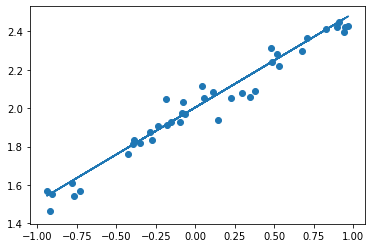

In [35]:
Y_pred = model.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred)
plt.show()